In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MCS
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem import *
from rdkit.Chem import AllChem, Draw, rdFMCS
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=False  
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from copy import deepcopy
from IPython.display import SVG
import time


import tf_routes
from tf_routes import preprocessing
from tf_routes import routes
from tf_routes import visualizations


C:\Users\josef\AppData\Local\Temp/ipykernel_14080/583891924.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS


In [2]:
import networkx as nx
import logging
logger = logging.getLogger(__name__)
logging.getLogger().setLevel(logging.INFO)

### interesting example molecules

In [3]:
methylindole2 = "CC1=CC2=CC=CC=C2N1"
neopentane = "CC(C)(C)C"
toluene = "CC1=CC=CC=C1"


ethane = "CC"

methylfuran2 = "CC1=CC=CO1"

cholesterol = "CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C"
cortisol = "CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O"


#neue molekuele
methanol = "CO"

naphthol2 = "C1=CC=C2C=C(C=CC2=C1)O"
#https://pubchem.ncbi.nlm.nih.gov/compound/85530192#section=3D-Conformer
dimethylindenol = "CC1=C(C2=CC=CC=C2C1O)C"

propylphenol4 = "CCCC1=CC=C(C=C1)O"

### or use molecules from the pdbbind-folder

In [4]:
files = os.listdir('pdbbindsdf20/')

In [5]:
print("Folder contains:")
print(files)

Folder contains:
['1a07_ligand.sdf', '1a0q_ligand.sdf', '1a0t_ligand.sdf', '1a1b_ligand.sdf', '1a1c_ligand.sdf', '1a1e_ligand.sdf', '1a2c_ligand.sdf', '1a3e_ligand.sdf', '1a4g_ligand.sdf', '1a4h_ligand.sdf', '1a4k_ligand.sdf', '1a4m_ligand.sdf', '1a4q_ligand.sdf', '1a4r_ligand.sdf', '1a4w_ligand.sdf', '1a5g_ligand.sdf', '1a5h_ligand.sdf', '1a5v_ligand.sdf', '1a7c_ligand.sdf', '1a7t_ligand.sdf']


In [6]:
#sdf to smiles

In [7]:

l1a07sdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a07_ligand.sdf' )
for i in l1a07sdf:
    l1a07 = Chem.MolToSmiles(i)

l1a1csdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a1c_ligand.sdf' )
for i in l1a1csdf:
    l1a1c = Chem.MolToSmiles(i)

l1a7csdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a7c_ligand.sdf' )
for i in l1a7csdf:
    l1a7c = Chem.MolToSmiles(i)
    
#interesting polycycles
l1a4msdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a4m_ligand.sdf' )
for i in l1a4msdf:
    l1a4m = Chem.MolToSmiles(i)
#ccore with:
l1a7tsdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a7t_ligand.sdf' )
for i in l1a7tsdf:
    l1a7t = Chem.MolToSmiles(i)
    
l1a0tsdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a0t_ligand.sdf' )
for i in l1a0tsdf:
    l1a0t = Chem.MolToSmiles(i)
    
l1a4hsdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a4h_ligand.sdf' )
for i in l1a4hsdf:
    l1a4h = Chem.MolToSmiles(i)
    
l1a4ksdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a4k_ligand.sdf' )
for i in l1a4ksdf:
    l1a4k = Chem.MolToSmiles(i)
    
l1a2csdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a2c_ligand.sdf' )
for i in l1a2csdf:
    l1a2c = Chem.MolToSmiles(i)
    
l1a5gsdf = Chem.SDMolSupplier('pdbbindsdf20/' + '1a5g_ligand.sdf' )
for i in l1a5gsdf:
    l1a5g = Chem.MolToSmiles(i)
    


In [8]:
#smiles to rdkit-mol

In [9]:
l1a07mol = Chem.MolFromSmiles(l1a07)

l1a1cmol = Chem.MolFromSmiles(l1a1c)

l1a7cmol = Chem.MolFromSmiles(l1a7c)

#interesting polycycles
l1a4mmol = Chem.MolFromSmiles(l1a4m)
l1a7tmol = Chem.MolFromSmiles(l1a7t)

l1a0tmol = Chem.MolFromSmiles(l1a0t)

l1a4hmol = Chem.MolFromSmiles(l1a4h)

l1a4kmol = Chem.MolFromSmiles(l1a4k)

l1a2cmol = Chem.MolFromSmiles(l1a2c)
l1a5gmol = Chem.MolFromSmiles(l1a5g)

# In the cell below, select two molecules for further processing!

In [10]:
#selection of two molecules

#mol1 = Chem.MolFromSmiles(cholesterol)

#mol2 = Chem.MolFromSmiles(cortisol)

#mol1 = l1a07mol

#mol2 = l1a7cmol

#mol1 = l1a2cmol

#mol2 = l1a5gmol

mol1 = Chem.MolFromSmiles(propylphenol4)

mol2 = Chem.MolFromSmiles(methanol)

In [11]:
#optionally, add hydrogens (in usual Transformato workflow, hydrogens are necessarily present)
mol1 = Chem.AddHs(mol1)
mol2 = Chem.AddHs(mol2)

In [12]:
mols = [mol1, mol2]

In [13]:
mol1 = preprocessing.generate_apply_dicts(mol1)
mol2 = preprocessing.generate_apply_dicts(mol2)

In [14]:
graphmol1 = preprocessing._mol_to_nx_full_weight(mol1)
graphmol2 = preprocessing._mol_to_nx_full_weight(mol2)

In [15]:
mol1coreindex, mol2coreindex, hit_ats1, hit_ats2, ccoremol = preprocessing.get_common_core_adjustHs(mol1=mols[0], mol2=mols[1], return_ccoremol=True)

### graphs are created and initialized with weights; now the search for a mutation route starts; first step: find connected dummy regions

In [16]:
subg1, G_dummy1 = preprocessing._find_connected_dummy_regions_mol(mol1, mol1coreindex, graphmol1)
subg2, G_dummy2 = preprocessing._find_connected_dummy_regions_mol(mol2, mol2coreindex, graphmol2)


In [17]:
terminaldummy1, terminalreal1 = preprocessing._find_terminal_atom(mol1coreindex,  mol1)

In [18]:
terminaldummy2, terminalreal2 = preprocessing._find_terminal_atom(mol2coreindex,  mol2)

In [19]:
matchterminal1 = preprocessing._match_terminal_real_and_dummy_atoms(mol1, terminalreal1, terminaldummy1)

In [20]:
matchterminal2 = preprocessing._match_terminal_real_and_dummy_atoms(mol2, terminalreal2, terminaldummy2)

In [21]:
#not necessary
#matchterminal1 = reduce_terminal(matchterminal1, subg1, G_dummy1)

### call mutation route algorithms

In [22]:
order1 = routes._calculate_order_of_LJ_mutations(
    subg1, matchterminal1, graphmol1
)

In [23]:
order2 = routes._calculate_order_of_LJ_mutations(
    subg2, matchterminal2, graphmol2
)

In [24]:
order1new = routes._calculate_order_of_LJ_mutations_new(
    subg1, matchterminal1, graphmol1
)

In [25]:
order1new = routes._calculate_order_of_LJ_mutations_new(
    subg1, matchterminal1, graphmol1
)

In [26]:
order1newiter = routes._calculate_order_of_LJ_mutations_new_iter(
    subg1, matchterminal1, graphmol1
)

In [27]:
order1newiter_change = routes._calculate_order_of_LJ_mutations_new_iter_change(
    subg1, matchterminal1, graphmol1
)

In [28]:
print("compare routes:")
print("dfs/transformato:")
print(order1)
print("bfs/dijkstra:")
print(order1new)
print("bfs/dijkstra iterated:")
print(order1newiter)
print("bfs/dijkstra iterated + dfs:")
print(order1newiter_change)

compare routes:
dfs/transformato:
[[7, 8, 0, 1, 2, 3, 4, 5, 6]]
bfs/dijkstra:
[[0, 1, 2, 3, 8, 4, 7, 5, 6]]
bfs/dijkstra iterated:
[[0, 1, 2, 3, 4, 8, 5, 7, 6]]
bfs/dijkstra iterated + dfs:
[[0, 1, 2, 3, 4, 8, 5, 7, 6]]


### visualize created routes

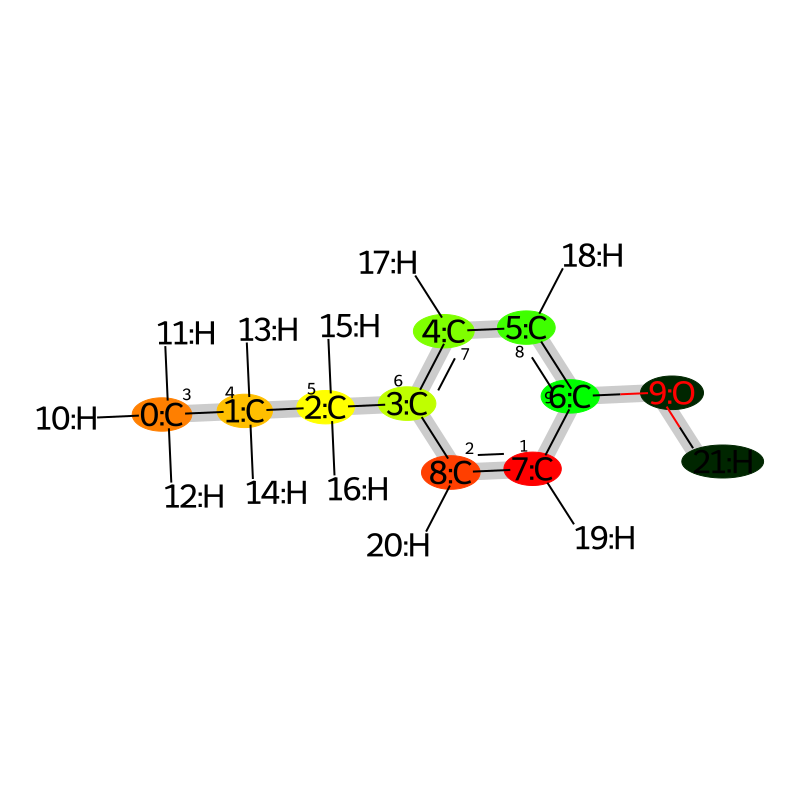

In [29]:
svmol1 = visualizations._show_common_core_gradient( mol1, hit_ats1, order1, percomponent = True, numbers = True)
SVG(svmol1)

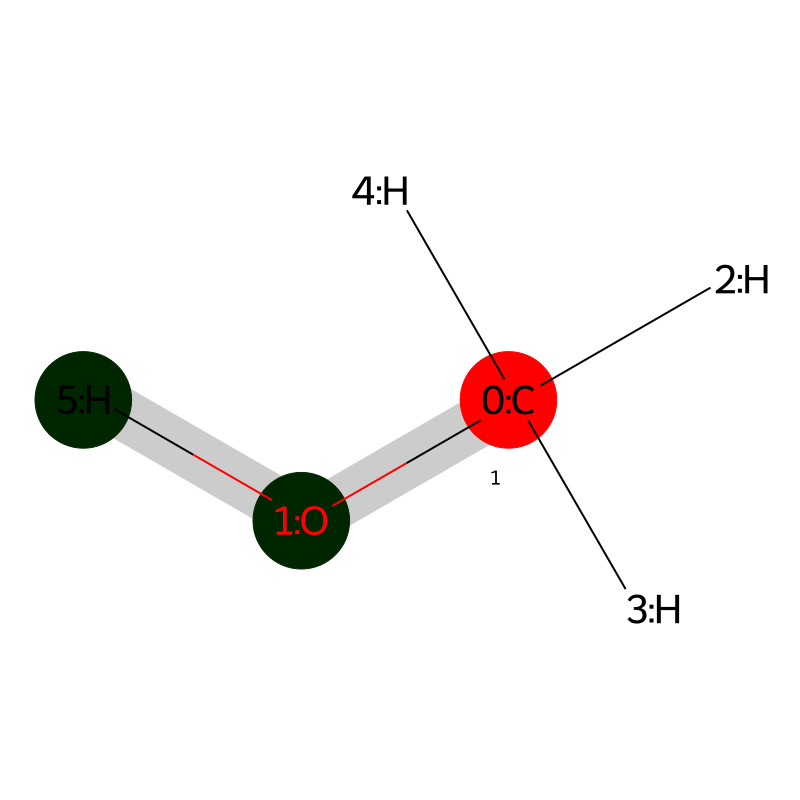

In [30]:
svmol2 = visualizations._show_common_core_gradient( mol2, hit_ats2, order2, percomponent = True, numbers = True)
SVG(svmol2)

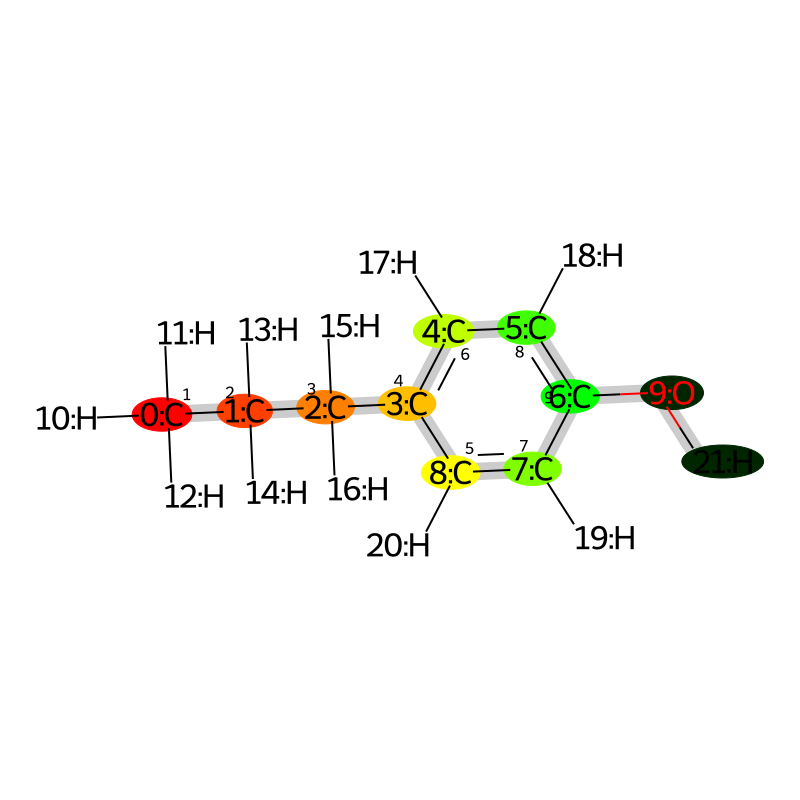

In [31]:
svmol1new = visualizations._show_common_core_gradient( mol1, hit_ats1, order1new, percomponent = True, numbers = True)                   
SVG(svmol1new)

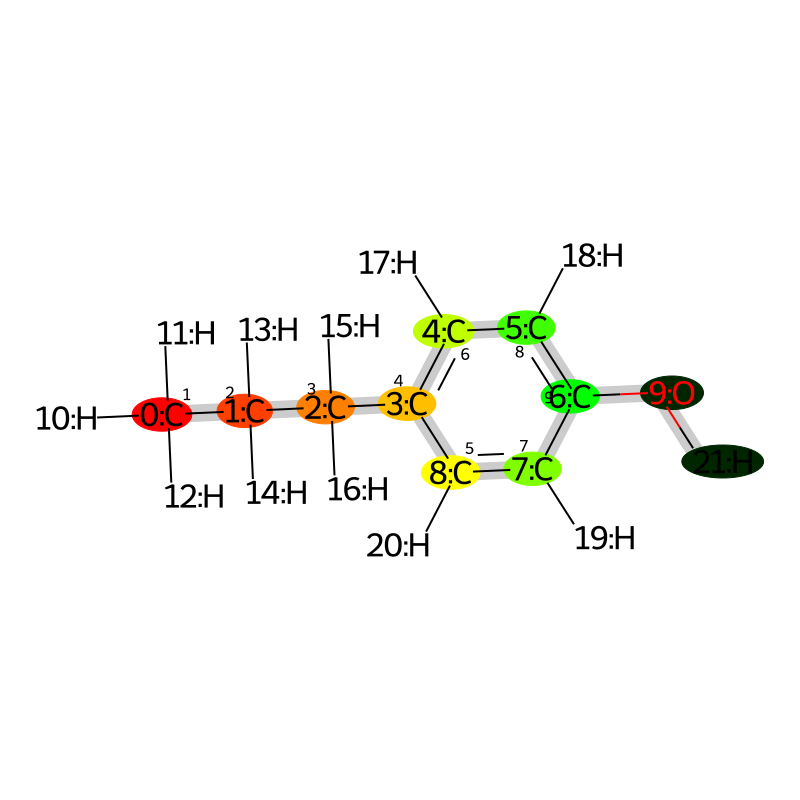

In [32]:
svmol1new = visualizations._show_common_core_gradient( mol1, hit_ats1, order1new, percomponent = True, numbers = True)                   
SVG(svmol1new)

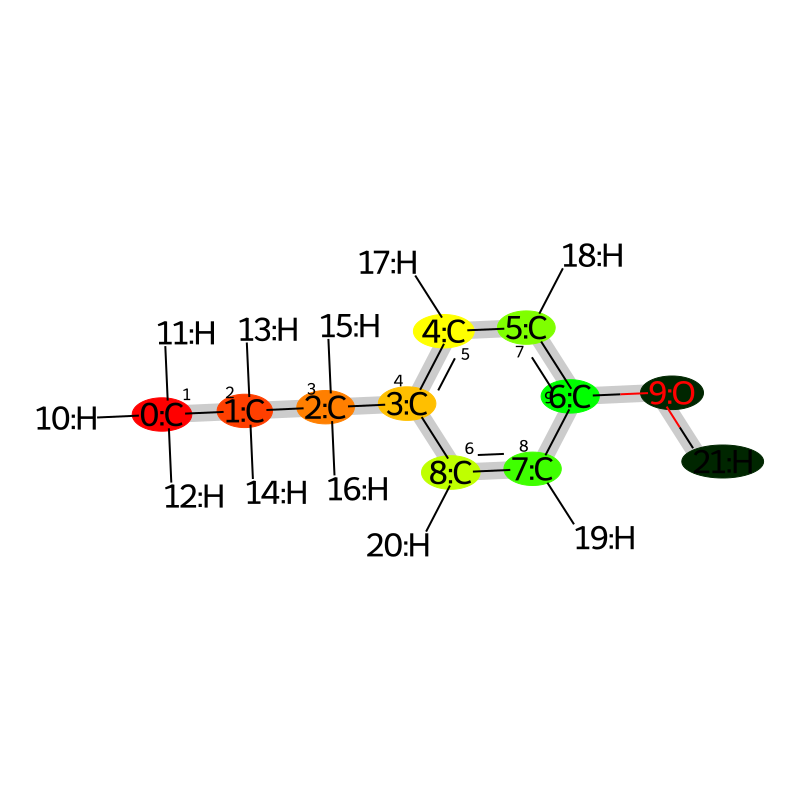

In [33]:
svmol1new_iter = visualizations._show_common_core_gradient( mol1, hit_ats1, 
                                         order1newiter, percomponent = True, numbers = True)
SVG(svmol1new_iter)

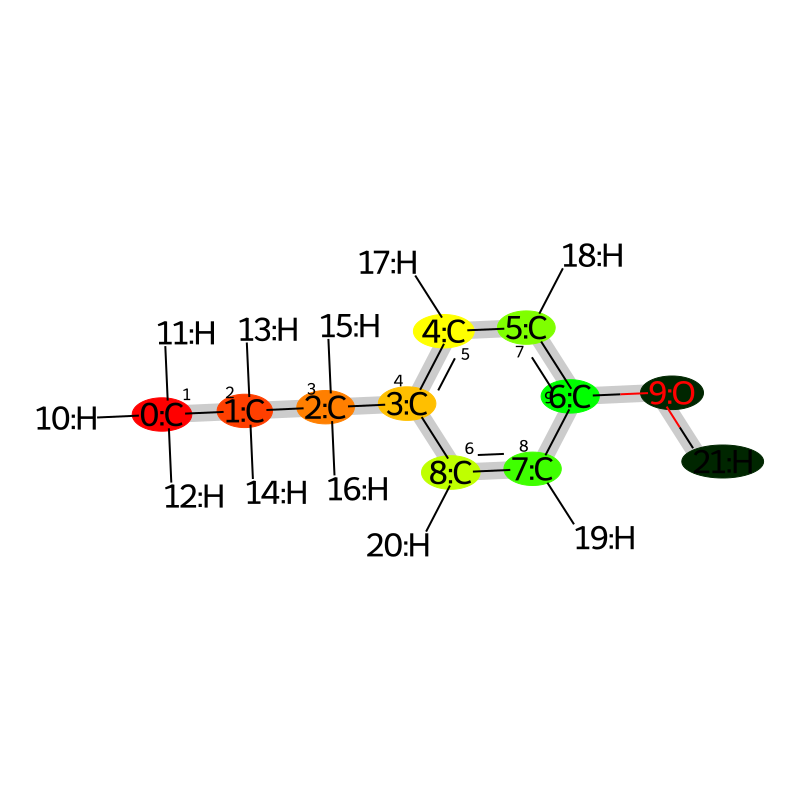

In [34]:
svmol1new_iter_change = visualizations._show_common_core_gradient( mol1, hit_ats1, 
                                         order1newiter_change, percomponent = True, numbers = True)
SVG(svmol1new_iter_change)

In [35]:
visualizations.animated_visualization_3d_v1_wo_ccoremol(mol1, order1newiter, hit_ats1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:
visualizations.animated_visualization_3d_v2_wo_ccoremol(mol1, order1newiter, hit_ats1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol